#### ▶ set connection for crypto coin data from coinmarketcap.com site by using API
       ※ API : Application Program Interface 
       (role as intermediary between tow different applications, servers & clients)

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b030a4cc-ef49-42d4-a5ee-55231f56c1bc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
#   print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)    # json file is dictionary-type data

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### ▶ . json_normalize( ) to pull out data from jaon file

In [4]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-05-16T15:08:39.888Z,0,None,25,1,None,9956


#### ▶ a new column appended into the dataframe

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')    # timestamp column with datetime function

df

C:\Users\comra\AppData\Local\Temp\ipykernel_17844\1530526145.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')    # timestamp column with datetime function


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11046,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969908e+07,1.969908e+07,False,NaN,1,NaN,NaN,None,2024-05-16T15:06:00.000Z,65655.013337,3.657741e+10,17.9994,-1.035602,1.715092,6.631558,5.389216,-2.510178,26.620210,1.293343e+12,54.9842,1.378755e+12,None,2024-05-16T15:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:08:40.850992
1,1027,Ethereum,ETH,ethereum,8936,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201184e+08,1.201184e+08,True,NaN,2,NaN,NaN,None,2024-05-16T15:06:00.000Z,2945.347301,1.429702e+10,11.7848,-1.314927,-0.942736,-1.392971,-3.324102,-17.831683,5.599103,3.537904e+11,15.0153,3.537904e+11,None,2024-05-16T15:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:08:40.850992
2,825,Tether USDt,USDT,tether,85692,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.109523e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-16T15:06:00.000Z,1.000154,6.975565e+10,17.6415,-0.033527,-0.017298,0.044772,-0.042959,0.107458,0.001945,1.109694e+11,4.7097,1.131040e+11,None,2024-05-16T15:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-16 15:08:40.850992
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475865e+08,1.475865e+08,False,NaN,4,NaN,NaN,None,2024-05-16T15:06:00.000Z,568.370892,2.010273e+09,7.8808,-1.722546,-1.981549,-4.952864,6.739160,-1.281698,58.134985,8.388389e+10,3.5601,8.388389e+10,None,2024-05-16T15:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:08:40.850992
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.487745e+08,5.761722e+08,True,NaN,5,NaN,NaN,None,2024-05-16T15:06:00.000Z,158.281449,3.877507e+09,35.7895,-2.975881,3.555020,9.327091,20.850625,-17.635542,45.047398,7.103268e+10,3.0147,9.119738e+10,None,2024-05-16T15:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:08:40.850992
5,3408,USDC,USDC,usd-coin,19151,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.331710e+10,3.331710e+10,False,NaN,6,NaN,NaN,None,2024-05-16T15:06:00.000Z,0.999930,7.925981e+09,25.2202,-0.006565,-0.029439,-0.006572,-0.020911,-0.016667,0.008612,3.331475e+10,1.4139,3.331475e+10,None,2024-05-16T15:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-16 15:08:40.850992
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,None,2024-05-16T15:07:00.000Z,0.515551,1.167688e+09,7.7088,-0.274756,0.754944,0.427686,5.881797,-16.381329,-7.535839,2.854046e+10,1.2120,5.155507e+10,None,2024-05-16T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:08:40.850992
7,11419,Toncoin,TON,toncoin,328,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474189e+09,5.106672e+09,True,NaN,8,3.414167e+09,2.273499e+10,None,2024-05-16T15:06:00.000Z,6.659017,7.473677e+08,101.2931,-1.060692,-4.234232,10.717087,10.649464,76.224669,204.447417,2.313469e+10,0.9819,3.400542e+10,None,2024-05-16T15:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:08:40.850992
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me.

#### ▶ creating the function to automate for connection, creating dataframe and csv file 

In [6]:
def api_runner():
    
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b030a4cc-ef49-42d4-a5ee-55231f56c1bc',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
#       print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    
    if not os.path.isfile(r'C:\Users\comra\Jupyter Project\Alex_project\crypto_api.csv'):
        df.to_csv(r'C:\Users\comra\Jupyter Project\Alex_project\crypto_api.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\comra\Jupyter Project\Alex_project\crypto_api.csv', mode='a', header=False)
        

#### ▶ executing the function every 60 sec by for loop
       - when the function is executed first time, csv file is created and data
         is appended to that file in every 60 sec

In [7]:
import os
from time import time
from time import sleep

In [8]:
for i in range(99):
    api_runner()
    print('api_runner() completed')
    sleep(60)
exit()

C:\Users\comra\AppData\Local\Temp\ipykernel_17844\710709965.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


api_runner() completed


C:\Users\comra\AppData\Local\Temp\ipykernel_17844\710709965.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


api_runner() completed


C:\Users\comra\AppData\Local\Temp\ipykernel_17844\710709965.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


api_runner() completed


C:\Users\comra\AppData\Local\Temp\ipykernel_17844\710709965.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


api_runner() completed


C:\Users\comra\AppData\Local\Temp\ipykernel_17844\710709965.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


api_runner() completed


C:\Users\comra\AppData\Local\Temp\ipykernel_17844\710709965.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


api_runner() completed


KeyboardInterrupt: 

In [9]:
df2 = pd.read_csv(r'C:\Users\comra\Jupyter Project\Alex_project\crypto_api.csv')

# df2

#### ▶ standardizing columns by regular expression

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df3 = df2.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 
                               'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                               'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.62852,1.78764,6.39949,5.52842,-2.38762,26.82995
Ethereum,-1.03350,-0.95423,-1.62859,-3.34424,-17.77690,5.65931
Tether USDt,-0.03067,-0.00085,0.06309,-0.04902,0.11576,-0.01144
BNB,-1.31096,-1.81053,-4.88603,6.83153,-1.05287,58.73340
Solana,-2.54968,3.74751,9.02426,20.72439,-17.29781,45.53755
USDC,-0.01572,-0.02456,-0.00763,-0.03232,-0.00956,0.01324
XRP,-0.02213,0.94840,0.45559,6.00003,-16.18899,-7.34812
Toncoin,-0.20948,-3.99217,10.85567,10.67877,77.59298,205.70296
Dogecoin,-1.47746,-1.37981,1.25935,-0.26456,0.25403,77.65194


#### ▶ apply . stack( ) to convert as pivot

In [12]:
df4 = df3.stack()

df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.62852
              quote.USD.percent_change_24h     1.78764
              quote.USD.percent_change_7d      6.39949
              quote.USD.percent_change_30d     5.52842
              quote.USD.percent_change_60d    -2.38762
              quote.USD.percent_change_90d    26.82995
Ethereum      quote.USD.percent_change_1h     -1.03350
              quote.USD.percent_change_24h    -0.95423
              quote.USD.percent_change_7d     -1.62859
              quote.USD.percent_change_30d    -3.34424
              quote.USD.percent_change_60d   -17.77690
              quote.USD.percent_change_90d     5.65931
Tether USDt   quote.USD.percent_change_1h     -0.03067
              quote.USD.percent_change_24h    -0.00085
              quote.USD.percent_change_7d      0.06309
              quote.USD.percent_change_30d    -0.04902
              quote.USD.percent_change_60d     0.11576
              quote.US

#### ▶ as . stack( ) produce series, convert it into dataframe by . to_frame( )

In [13]:
df5 = df4.to_frame(name='values')

df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.62852
             quote.USD.percent_change_24h   1.78764
             quote.USD.percent_change_7d    6.39949
             quote.USD.percent_change_30d   5.52842
             quote.USD.percent_change_60d  -2.38762
             quote.USD.percent_change_90d  26.82995
Ethereum     quote.USD.percent_change_1h   -1.03350
             quote.USD.percent_change_24h  -0.95423
             quote.USD.percent_change_7d   -1.62859
             quote.USD.percent_change_30d  -3.34424
             quote.USD.percent_change_60d -17.77690
             quote.USD.percent_change_90d   5.65931
Tether USDt  quote.USD.percent_change_1h   -0.03067
             quote.USD.percent_change_24h  -0.00085
             quote.USD.percent_change_7d    0.06309
             quote.USD.percent_change_30d  -0.04902
             quote.USD.percent_change_60d   0.11576
             quote.USD.percent_change_90d  -0.01144
BNB          quote.USD.percent_change_1h   -1.31096
             quote.USD.percent_change_24h  -1.81053
             quote.USD.percent_change_7d   -4.88603
             quote.USD.percent_change_30d   6.83153
             quote.USD.percent_change_60d  -1.05287
             quote.USD.percent_change_90d  58.73340
Solana       quote.USD.percent_change_1h   -2.54968
             quote.USD.percent_change_24h   3.74751
             quote.USD.percent_change_7d    9.02426
             quote.USD.percent_change_30d  20.72439
             quote.USD.percent_change_60d -17.29781
             quote.USD.percent_change_90d  45.53755
USDC         quote.USD.percent_change_1h   -0.01572
             quote.USD.percent_change_24h  -0.02456
             quote.USD.percent_change_7d   -0.00763
             quote.USD.percent_change_30d  -0.03232
             quote.USD.percent_change_60d  -0.00956
             quote.USD.percent_change_90d   0.01324
XRP          quote.USD.percent_change_1h   -0.02213
             quote.USD.percent_change_24h   0.94840
             quote.USD.percent_change_7d    0.45559
             quote.USD.percent_change_30d   6.00003
             quote.USD.percent_change_60d -16.18899
             quote.USD.percent_change_90d  -7.34812
Toncoin      quote.USD.percent_change_1h   -0.20948
             quote.USD.percent_change_24h  -3.99217
             quote.USD.percent_change_7d   10.85567
             quote.USD.percent_change_30d  10.67877
             quote.USD.percent_change_60d  77.59298
             quote.USD.percent_change_90d 205.70296
Dogecoin     quote.USD.percent_change_1h   -1.47746
             quote.USD.percent_change_24h  -1.37981
             quote.USD.percent_change_7d    1.25935
             quote.USD.percent_change_30d  -0.26456
             quote.USD.percent_change_60d   0.25403
             quote.USD.percent_change_90d  77.65194
Cardano      quote.USD.percent_change_1h   -0.64427
             quote.USD.percent_change_24h   1.42946
             quote.USD.percent_change_7d   -0.37630
             quote.USD.percent_change_30d   0.10830
             quote.USD.percent_change_60d -33.09600
             quote.USD.percent_change_90d -23.37143
Shiba Inu    quote.USD.percent_change_1h   -1.43537
             quote.USD.percent_change_24h   1.30613
             quote.USD.percent_change_7d    7.16629
             quote.USD.percent_change_30d  10.14507
             quote.USD.percent_change_60d -10.37335
             quote.USD.percent_change_90d 149.80431
Avalanche    quote.USD.percent_change_1h   -1.56507
             quote.USD.percent_change_24h  -1.03816
             quote.USD.percent_change_7d   -0.65827
             quote.USD.percent_change_30d   0.18537
             quote.USD.percent_change_60d -37.62435
             quote.USD.percent_change_90d -15.14912
TRON         quote.USD.percent_change_1h   -0.22015
             quote.USD.percent_change_24h  -0.81240
             quote.USD.percent_change_7d   -1.58982
             quote.USD.percent_change_30d

#### ▶ set new index & set new column name

In [14]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.62852
1,Bitcoin,quote.USD.percent_change_24h,1.78764
2,Bitcoin,quote.USD.percent_change_7d,6.39949
3,Bitcoin,quote.USD.percent_change_30d,5.52842
4,Bitcoin,quote.USD.percent_change_60d,-2.38762
5,Bitcoin,quote.USD.percent_change_90d,26.82995
6,Ethereum,quote.USD.percent_change_1h,-1.03350
7,Ethereum,quote.USD.percent_change_24h,-0.95423
8,Ethereum,quote.USD.percent_change_7d,-1.62859
9,Ethereum,quote.USD.percent_change_30d,-3.34424


In [15]:
df7 = df6.rename(columns={'level_1': 'percent_change'})

df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.62852
1,Bitcoin,quote.USD.percent_change_24h,1.78764
2,Bitcoin,quote.USD.percent_change_7d,6.39949
3,Bitcoin,quote.USD.percent_change_30d,5.52842
4,Bitcoin,quote.USD.percent_change_60d,-2.38762
5,Bitcoin,quote.USD.percent_change_90d,26.82995
6,Ethereum,quote.USD.percent_change_1h,-1.03350
7,Ethereum,quote.USD.percent_change_24h,-0.95423
8,Ethereum,quote.USD.percent_change_7d,-1.62859
9,Ethereum,quote.USD.percent_change_30d,-3.34424


In [16]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h',
                                                       'quote.USD.percent_change_24h',
                                                       'quote.USD.percent_change_7d', 
                                                       'quote.USD.percent_change_30d',
                                                       'quote.USD.percent_change_60d', 
                                                       'quote.USD.percent_change_90d'],
                                                      ['1h', '24h', '7d', '30d', '60d', '90'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.62852
1,Bitcoin,24h,1.78764
2,Bitcoin,7d,6.39949
3,Bitcoin,30d,5.52842
4,Bitcoin,60d,-2.38762
5,Bitcoin,90,26.82995
6,Ethereum,1h,-1.03350
7,Ethereum,24h,-0.95423
8,Ethereum,7d,-1.62859
9,Ethereum,30d,-3.34424


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

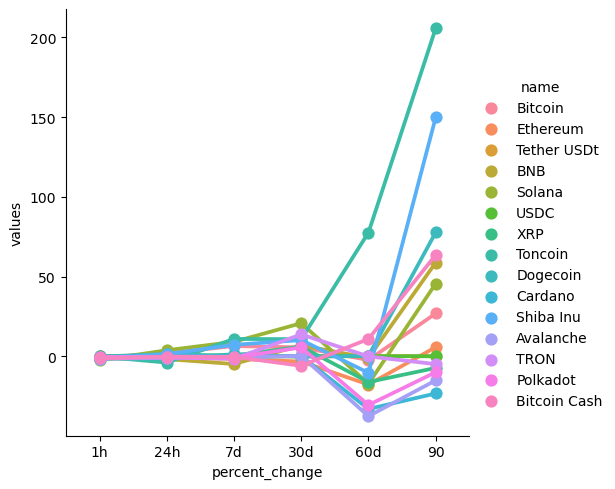

In [18]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [19]:
df8 = df2[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")

df8

,name,quote.USD.price,timestamp
0,Bitcoin,65655.01334,2024-05-16 15:08:41.025605
15,Bitcoin,65623.44837,2024-05-16 15:09:41.220727
30,Bitcoin,65732.30044,2024-05-16 15:10:41.427863
45,Bitcoin,65732.30044,2024-05-16 15:11:41.619090
60,Bitcoin,65753.80580,2024-05-16 15:12:41.785568
75,Bitcoin,65780.14019,2024-05-16 15:13:41.978850


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

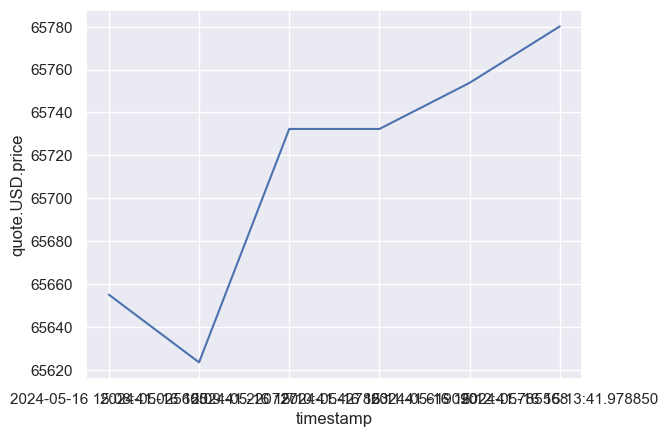

In [20]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)